In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('stock_data_output/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

,AGR,BID,VCB,CTG
2017-01-03,2380,9800,23210,9970
2017-01-04,2290,9990,23050,10160
2017-01-05,2330,9960,23150,10220
2017-01-06,2320,10180,23610,10310
2017-01-09,2350,10480,24110,10590


In [17]:
dataset = df.AGR.values.reshape(-1, 1)
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1723

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01199338],
       [0.0082713 ],
       [0.00992556],
       ...,
       [0.81513648],
       [0.79445823],
       [0.76137304]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01199338, 0.0082713 , 0.00992556, 0.00951199, 0.01075269,
       0.01364764, 0.01406121, 0.01406121, 0.01406121, 0.01323408,
       0.01282051, 0.01282051, 0.01571547, 0.01695616, 0.01943755,
       0.01985112, 0.02688172, 0.03473945, 0.03928867, 0.0401158 ,
       0.03763441, 0.03804797, 0.04673284, 0.05252275, 0.06203474,
       0.06203474, 0.06451613, 0.05417701, 0.0471464 , 0.04631927,
       0.05086849, 0.04301075, 0.03722084, 0.02894955, 0.03722084,
       0.04590571, 0.03928867, 0.03928867, 0.03515302, 0.04052936,
       0.04052936, 0.03970223, 0.03722084, 0.03970223, 0.03846154,
       0.0388751 , 0.03556658, 0.04301075, 0.04590571, 0.05086849,
       0.05252275, 0.06203474, 0.07278743, 0.08354012, 0.0719603 ,
       0.06741108, 0.05707196, 0.06617039, 0.05872622, 0.05417701])]
[0.060380479735318446]

[array([0.01199338, 0.0082713 , 0.00992556, 0.00951199, 0.01075269,
       0.01364764, 0.01406121, 0.01406121, 0.01406121, 0.01323408,
       0.01282051, 0.01282051, 0.0

# LSTM MODEL

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/home/nvkhoa14/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1663/1663 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - loss: 0.0049


In [21]:
scaled_data

array([[0.01199338],
       [0.0082713 ],
       [0.00992556],
       ...,
       [0.81513648],
       [0.79445823],
       [0.76137304]])

In [22]:
# Create a new array containing scaled values from index 2638 to end
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # use to RMSE
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60 : i, 0])
# Convert the data to a numpy array

x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


595.7880412195371

In [55]:
xtick_positions = range(0, len(df), 150)
xtick_labels = df.index[xtick_positions]
xtick_labels

Index(['2017-01-03', '2017-08-11', '2018-03-22', '2018-10-24', '2019-06-06',
       '2020-01-06', '2020-08-13', '2021-03-22', '2021-10-25', '2022-06-03',
       '2023-01-03', '2023-08-11', '2024-03-20'],
      dtype='object')

In [65]:
train = df[:training_data_len]
train

,AGR,BID,VCB,CTG
2017-01-03,2380,9800,23210,9970
2017-01-04,2290,9990,23050,10160
2017-01-05,2330,9960,23150,10220
2017-01-06,2320,10180,23610,10310
2017-01-09,2350,10480,24110,10590
...,...,...,...,...
2023-11-17,15000,38070,85600,26580
2023-11-20,15500,38290,86100,26440
2023-11-21,15650,39000,86600,26310
2023-11-22,15900,38690,86700,26490


In [67]:
valid = df[training_data_len:]
valid

,AGR,BID,VCB,CTG
2023-11-24,15500,38730,86000,26490
2023-11-27,15150,38160,85800,26310
2023-11-28,15400,38850,85800,26220
2023-11-29,15600,39300,85100,26310
2023-11-30,15400,38850,84700,26300
...,...,...,...,...
2024-04-01,22150,52100,95200,35000
2024-04-02,22300,51900,94500,35000
2024-04-03,21800,51000,93800,34050
2024-04-04,21300,51000,96000,33550


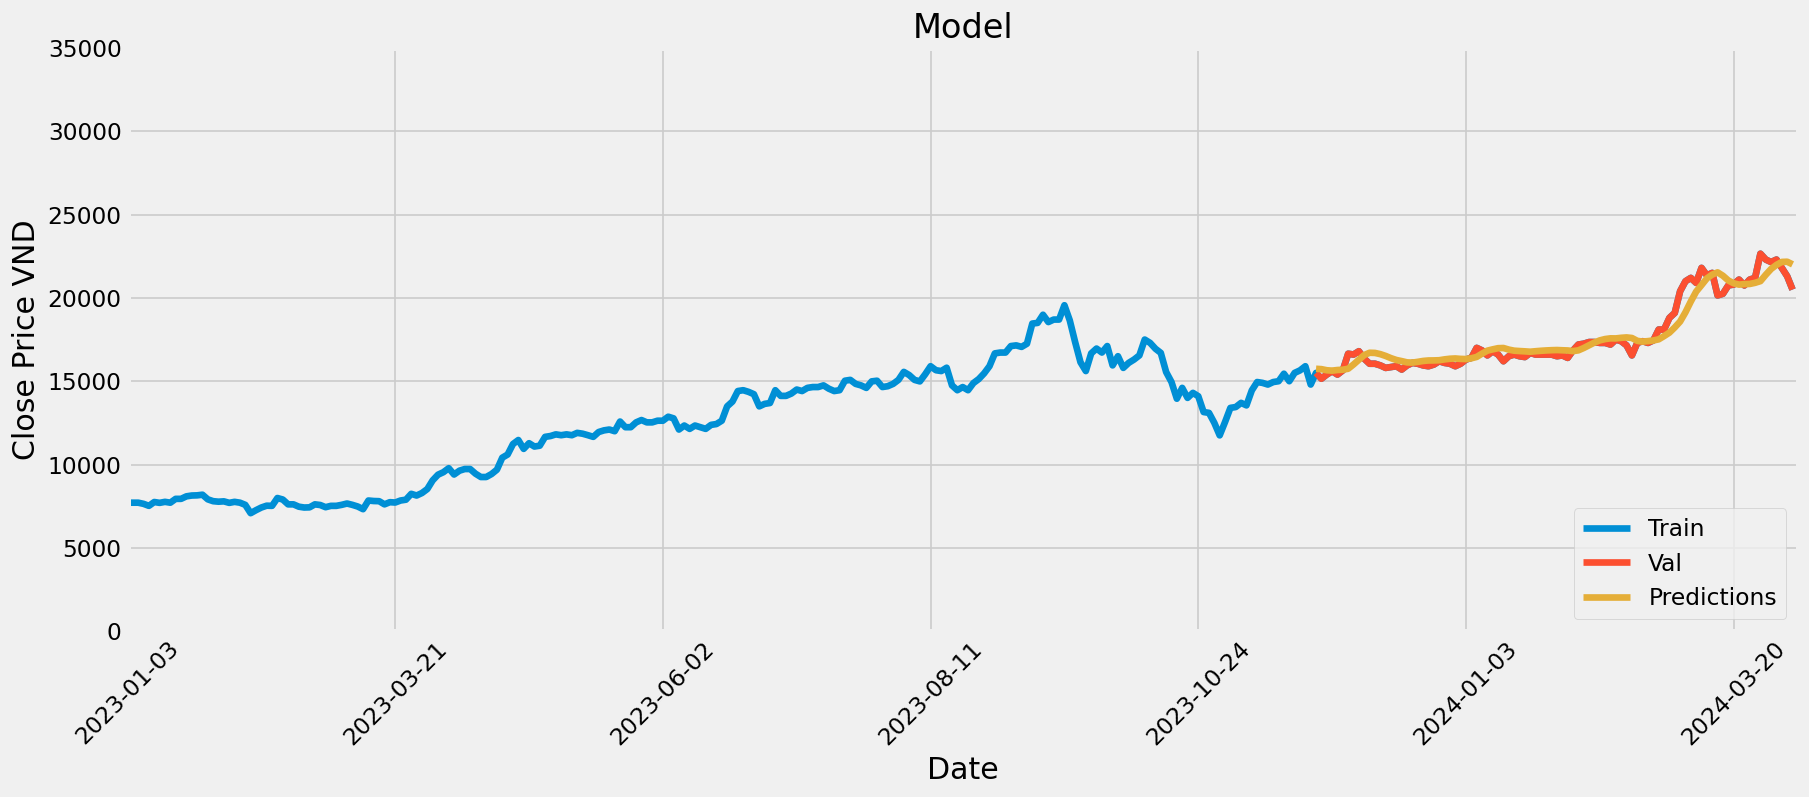

In [70]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price VND', fontsize=18)
plt.plot(df['AGR'])
plt.plot(valid[['AGR', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
xtick_positions = range(0, len(df), 50)
xtick_labels = df.index[xtick_positions]
plt.xticks(xtick_positions, xtick_labels, rotation=45)
plt.axis([1500, 1812, 0, 35000])
plt.show()